In [34]:
import pandas
import requests
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC


r = requests.get(
    "https://raw.githubusercontent.com/lutydlitatova/czechitas-datasets/main/datasets/soybean-2-rot.csv"
)
open("soybean-2-rot.csv", "wb").write(r.content)
data = pandas.read_csv("soybean-2-rot.csv")

data

,plant-stand,temp,hail,crop-hist,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,...,fruiting-bodies,external-decay,mycelium,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,normal,gt-norm,yes,same-lst-yr,pot-severe,fungicide,90-100,abnorm,abnorm,absent,...,absent,absent,absent,norm,absent,absent,norm,absent,norm,charcoal-rot
1,normal,norm,no,same-lst-yr,pot-severe,fungicide,80-89,abnorm,abnorm,absent,...,absent,absent,absent,norm,absent,absent,norm,absent,norm,charcoal-rot
2,normal,norm,yes,same-lst-yr,pot-severe,none,90-100,abnorm,abnorm,absent,...,absent,absent,absent,norm,absent,absent,norm,absent,norm,charcoal-rot
3,normal,norm,no,same-lst-sev-yrs,pot-severe,fungicide,90-100,abnorm,abnorm,absent,...,absent,absent,absent,norm,absent,absent,norm,absent,norm,charcoal-rot
4,normal,gt-norm,yes,same-lst-yr,pot-severe,fungicide,80-89,abnorm,abnorm,absent,...,absent,absent,absent,norm,absent,absent,norm,absent,norm,charcoal-rot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,normal,norm,yes,same-lst-two-yrs,pot-severe,fungicide,80-89,norm,abnorm,absent,...,absent,absent,absent,norm,absent,absent,norm,absent,norm,brown-stem-rot
148,normal,norm,yes,same-lst-yr,pot-severe,none,90-100,norm,abnorm,absent,...,absent,absent,absent,norm,absent,absent,norm,absent,norm,brown-stem-rot
149,normal,gt-norm,yes,same-lst-two-yrs,pot-severe,fungicide,90-100,norm,abnorm,absent,...,absent,absent,absent,norm,absent,absent,norm,absent,norm,brown-stem-rot
150,normal,norm,yes,same-lst-yr,pot-severe,none,90-100,norm,abnorm,absent,...,absent,absent,absent,norm,absent,absent,norm,absent,norm,brown-stem-rot


In [35]:
X = data.drop(columns=["class"])
y = data["class"]
y.value_counts()

phytophthora-rot    88
brown-stem-rot      44
charcoal-rot        20
Name: class, dtype: int64

In [36]:
encoder = OneHotEncoder()
X = encoder.fit_transform(X)

pandas.DataFrame(X.toarray(), columns=encoder.get_feature_names_out()).head()

,plant-stand_lt-normal,plant-stand_normal,temp_gt-norm,temp_lt-norm,temp_norm,hail_no,hail_yes,hail_nan,crop-hist_diff-lst-year,crop-hist_same-lst-sev-yrs,...,mold-growth_absent,mold-growth_nan,seed-discolor_absent,seed-discolor_nan,seed-size_norm,seed-size_nan,shriveling_absent,shriveling_nan,roots_norm,roots_rotted
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [37]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

{'max_depth': 7, 'min_samples_leaf': 1}
0.9


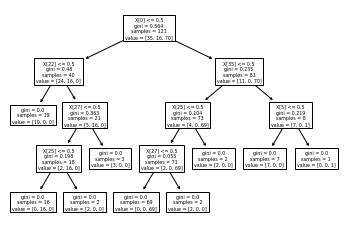

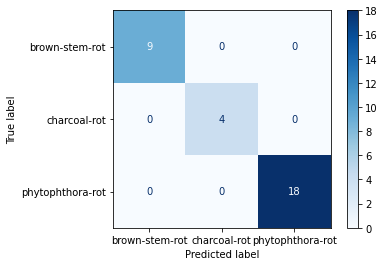

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model_1 = DecisionTreeClassifier(random_state=42)
params_1 = {"max_depth": [1, 5, 7, 11, 13], "min_samples_leaf": [1, 5, 7, 11, 13]}


clf_1 = GridSearchCV(model_1, params_1, scoring="f1_weighted")
clf_1.fit(X_train, y_train)

print(clf_1.best_params_)
print(round(clf_1.best_score_,2))

model_1 = DecisionTreeClassifier(random_state=42, max_depth=7, min_samples_leaf=1)
clf = model_1.fit(X_train, y_train)
y_pred = clf.predict(X_test)
tree.plot_tree(clf)
plt.show()

confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=encoder.classes_,
    cmap=plt.cm.Blues,
)



In [39]:
f1_score(y_test, y_pred, average="weighted")


1.0

In [40]:
accuracy_score(y_test, y_pred)

1.0